In [352]:
%run master_functions.ipynb

# Load Data

In [2]:
res = 'MET'

ihmm = file_rw.load_object('saved_parameters/2000iter_%s_unseeded.pl' % res)['ihmm']

# Visualize Unclustered State Sequences

In [ ]:
for i in range(len(ihmm)):
    print('Trajectory %d' % i)
    ihmm[i].summarize_results(traj_no=0)

# Save Unclustered Sequence

In [ ]:
# Save one for the paper
#hmm[2].summarize_results(traj_no=0, savename='/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/rz_unclustered_%s.pdf' % res)
#ihmm[2].summarize_results(traj_no=0, savename='/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/supporting_figures/xyz_hmm.pdf')

# Plot Realizations for Qualitative Matching

In [ ]:
# Qualitative comparison for paper
save = False
traj_no = 2
ntraj = 3
np.random.seed(3)  # 3, 9, 10, 13

final_p = get_params([ihmm[traj_no]], ihmm[traj_no], ihmm[traj_no].z, clustered=False)

trajectory_generator = GenARData(params=final_p)
trajectory_generator.gen_trajectory(ihmm[traj_no].z.shape[1], ntraj, bound_dimensions=[0], resample_T=True, progress=False)

if save:
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/qualitative_unclustered_MET2.pdf'
    
else:
    
    savename = None

plot_realizations(ihmm[traj_no].com[1:, ...], trajectory_generator.traj, savename=savename)

# Load or Generate Unclustered Realizations

In [ ]:
# load or generate unclustered realizations
load = True
save = True
mod_T = False
ntrajper = 10
exclude = []

pre_cluster_hops_, pre_cluster_dwells_, unclustered_trajectory_realizations = \
    unclustered_trajectories(ihmm, ntrajper, load=load, mod_T=mod_T, save=save, exclude=exclude, mod_T_percentile=20, 
                             mod_T_increase_factor=2.25, mod_T_decrease_factor=1)

# Plot Unclustered MSDs of Individual Trajectories

Plot the MSD of the unclustered trajectories for each solute compared with the MD MSD of that solute trajectory

In [ ]:
# Plot the MSD of the unclustered trajectories for each solute compared with the MD MSD of that solute trajectory

for traj_no in range(24):
    individual_unclustered_realizations(res, traj_no, unclustered_trajectory_realizations)

# Load Clustered Parameters

If you still need to cluster, see Clustering.ipynb

In [4]:
A, sigma, mu, T, mu_weights = organize_parameters(ihmm) # arrange parameters into arrays suitable for clustering

linkage='ward'  # possibilities: {“ward”, “complete”, “average”, “single”}

tot_clusters = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
 
final_parameters, trajectory_generators, clustered_labels = file_rw.load_object('clusters_%s_%s.pl' %(res, linkage))
print('Loaded clusters_%s_%s.pl' % (res, linkage))

Loaded clusters_MET_ward.pl


# Plot Clustered and Unclustered MSDs

In [ ]:
# tot_clusters = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
# tot_clusters = [8, 10, 12, 14, 16, 18]
tot_clusters = [10, 15, 20, 25, 30]

save = True
if save:
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/msd_nclusters.pdf'
else:
    savename = None

plot_msds(tot_clusters=tot_clusters, confidence=68, nboot=10, dt=0.5, endshow=2000, endshow_inset=50, 
          unclustered_realizations=True, clustered_realizations=True, exclude_outliers=False, savename=savename,
          figsize=(5.5, 6), bbox_to_anchor=(0.04, -.2), ncol_legend=2)

# Plot Clustered State Sequence

In [ ]:
save = False
traj_no = 2  # trajectory number
cluster_no = 10  # number of clusters

# Must load clustered parameters for this to work
z = final_parameters[cluster_no]['ihmm_final'].z  # state sequence for this number of clusters.
com = ihmm[traj_no].com[1:, ...]

if save:
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/clustered_traj_%s_%s_%d.pdf' %(res, linkage, cluster_no)
else:
    savename = None

#for seed in range(5, 30):
#    print(seed)
print(np.unique(z[traj_no, :]).size)
print(A.shape)
plot_state_sequence(com, z[traj_no, :], r_convert=True, cmap=plt.cm.jet, dt=0.5, savename=savename, seed=7)

# Create Qualitative Realizations of Clustered Trajectories

In [ ]:
# Qualitative comparison for paper
save = True
trajectories = [2, 3, 5]
ntraj = 3

# np.random.seed(3)  # 3, 9, 10, 13 
# seed = np.random.randint(0, 1000000000)
# seed = 996784332

#np.random.seed(seed)

cluster_no = 20

trajectory_generator = GenARData(params=final_parameters[cluster_no])
trajectory_generator.gen_trajectory(ihmm[trajectories[0]].z.shape[1], ntraj, bound_dimensions=[0], resample_T=True, progress=False)

if save:

    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/qualitative_clustered_%s_%d.pdf' % (res, cluster_no) 

else:

    savename = None

com = ihmm[trajectories[0]].com[1:, ...]
for i in range(1, len(trajectories)):
    com = np.concatenate((com, ihmm[trajectories[i]].com[1:, ...]), axis=1)

plot_realizations(com, trajectory_generator.traj, savename=savename, figsize=(10, 7))

# Plot Clustered Parameters

In [ ]:
tot_clusters = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
# tot_clusters = [20]

mur = np.linalg.norm(mu[:2, :], axis=0)

for link in ['ward']: #['ward', 'complete', 'average', 'single']:
    
    final_parameters, trajectory_generators, clustered_labels = file_rw.load_object('clusters_%s_%s.pl' %(res, link))
    
    for nclusters in tot_clusters:
        print('N Clusters: %d, %s linkage' % (nclusters, link))

        plot_clustered_params(A, sigma, mu, T, clustered_labels[nclusters], final_parameters[nclusters]['z'])
        plt.show()

# Plot Cluster Populations

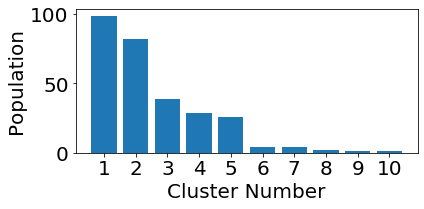

In [7]:
save = False

tot_clusters_ = [10]

mur = np.linalg.norm(mu[:2, :], axis=0)

for link in ['ward']:#, 'complete', 'average', 'single']:
    
    final_parameters, trajectory_generators, clustered_labels = file_rw.load_object('clusters_%s_%s.pl' %(res, link))
    fig, ax = plt.subplots(len(tot_clusters_), 1, figsize=(6, len(tot_clusters_)*3))
    #ax[0].set_title('%s linkage' % link, fontsize=16)
    for c, nclusters in enumerate(tot_clusters_):
        
        n = []
        labels = np.array(clustered_labels[nclusters])
        for i in np.unique(labels):
            ndx = np.where(labels == i)[0]
            n.append(len(ndx))
            
        n = np.array(n)[np.argsort(n)][::-1]
        
        if len(tot_clusters_) == 1:
            ax_ = ax
        else:
            ax_ = ax[c]
            
        ax_.bar(np.arange(1, len(n) + 1), n)
        ax_.set_ylabel('Population', fontsize=20)
        ax_.tick_params(labelsize=20)
        ax_.set_xticks(np.arange(1, nclusters + 1))
        ax_.set_xticklabels(np.arange(1, nclusters + 1))
    
    ax_.set_xlabel('Cluster Number', fontsize=20)

    fig.tight_layout()
    
    if save:
        
        fig.savefig('/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/supporting_figures/nclusters_%s.pdf' % link)


# Plot Spread in Radial Means

In [ ]:
save = False
tot_clusters = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
mur = np.linalg.norm(mu[:2, :], axis=0)
plt.figure(figsize=(8, 4.5))

for link in ['ward']: #, 'complete', 'average', 'single']:
    
    final_parameters_, trajectory_generators_, clustered_labels_ = file_rw.load_object('clusters_%s_%s.pl' %(res, link))

    spread= []
    
    for nclusters in tot_clusters:
               
        mu_ = get_clustered_mur(mur, np.array(clustered_labels_[nclusters]), weights=True)
        
        spread.append(np.std(mu_))

    plt.plot(tot_clusters, spread, lw=2, label=link)

plt.plot([tot_clusters[0], tot_clusters[-1]], [mur.std(), mur.std()], color='black', lw=2, label='unclustered')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Standard deviation of $\mu_r$', fontsize=14)
plt.tick_params(labelsize=14)
plt.legend(fontsize=14, loc='upper left', bbox_to_anchor=(1.0, 1.04))
plt.tight_layout()

if save:
    
    plt.savefig('/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/supporting_figures/rspread_nclusters.pdf')
    
plt.show()

# Plot Fluctuation Emission Distribution

In [ ]:
save = False

md_traj = ihmm[0].com
for i in range(1, len(ihmm)):
    md_traj = np.concatenate((md_traj, ihmm[i].com), axis=1)

# trajectory_generators[0].traj.shape
a, b, c, d = unclustered_trajectory_realizations.shape
ihmm_traj = np.zeros([b, a*c, d])
for i in range(a):
    ihmm_traj[:, i*c:(i + 1)*c, :] = unclustered_trajectory_realizations[i, ...]

if save: 
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/emission_widths.pdf'
    
else:
    
    savename = None
    
plot_hop_emissions(md_traj, ihmm_traj, savename=savename)

# Plot Emission Distribution from Individual States

In [ ]:
save = False

md_traj = ihmm[0].com
for i in range(1, len(ihmm)):
    md_traj = np.concatenate((md_traj, ihmm[i].com), axis=1)

nclusters = 20
state_no = 1

# use this to determine good states to plot (ones with lots of emissions)
prev_states, prevelant_state_counts = prevalent_states(final_parameters[nclusters]['z'], percent=34)
z = final_parameters[nclusters]['z']
for i in prev_states:
    ndx = np.where(z.flatten() == i)[0]
    print(i, len(ndx))

if save:
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/state_emission_widths.pdf'
else:
    savename = None
    
plot_state_emissions(md_traj, final_parameters[nclusters], state_no, xrange=(-0.75, 0.75), show_ax=[1], savename=savename, nstepsgen=10000)

# Prevalence of States

[6 1 3 0 2 8 7 4 9 5]


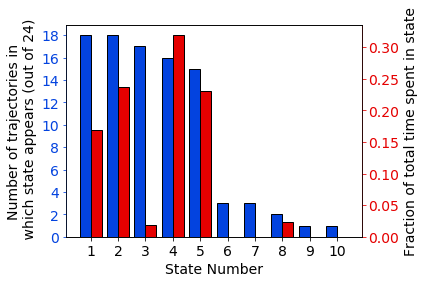

In [134]:
nclusters = 10
prev_states, prevelant_state_counts = prevalent_states(final_parameters[nclusters]['z'], percent=0)

ax_color = 'xkcd:blue'
ax2_color = 'xkcd:red'

fig, ax = plt.subplots()
ax2 = ax.twinx()

labels = np.array(clustered_labels[nclusters])
frac_time = np.array([mu_weights[np.where(labels == x)[0]].sum() / mu_weights.sum() for x in range(nclusters)])

ordered = np.argsort(prevelant_state_counts)[::-1]
# ordered = np.argsort(final_parameters[nclusters]['mu'][:, 0])

bin_width = 0.4
ax.bar(np.arange(1, nclusters + 1) - bin_width/2, prevelant_state_counts[ordered], bin_width, color=ax_color, edgecolor='black')
ax2.bar(np.arange(1, nclusters + 1) + bin_width/2, frac_time[ordered], bin_width, color=ax2_color, edgecolor='black')

ax.spines['left'].set_color(ax_color)
ax.spines['right'].set_color(ax2_color)
# ax.spines['top'].set_color('red')
# ax.xaxis.label.set_color('red')  # set labels

ax.tick_params(labelsize=14, axis='y', colors=ax_color)
ax2.tick_params(labelsize=14, axis='y', colors=ax2_color)
ax.tick_params(labelsize=14)

ax.set_xlabel('State Number', fontsize=14)
ax.set_xticks(np.arange(1, nclusters + 1))
#plt.set_xtick_labels(np.arange(1, nclusters + 1))
ax.set_ylabel('Number of trajectories in\n which state appears (out of 24)', fontsize=14)
ax2.set_ylabel('Fraction of total time spent in state', fontsize=14)

ax.set_yticks(np.arange(0, max(prevelant_state_counts) + 2, 2))
# plt.set_xticklabels(np.arange(0, 18))
fig.tight_layout()
fig.savefig('/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/prevalence.pdf')
plt.show()

# Visualize Mechanisms

In [ ]:
def mechanisms(ihmm, res, z, solutes=None, fontsize=14, ma=10, savename=None, mapcolors=False, T=None, mur=None, seed=None):
    
    # coloring
    carb = 1
    head = 2
    tails = 3
    other_solutes = 0
    monomer_colors = {'O': head, 'O1': head, 'O2': head, 'O3': carb, 'O4': carb, 'O5': tails, 'O6': tails, 'O7': tails, 'O8': tails, 'O9': tails, 'O10': tails, 'N1': other_solutes, 'N': other_solutes}

    hbonds = file_rw.load_object('trajectories/hbond_summary_%s.pl' % res)
    hbonded = hbonds['hbonded']
    hbonded_to = hbonds['bonded_to']
    dens = file_rw.load_object('trajectories/local_density_%s.pl' % res)
    
    if solutes is None:
        solutes = np.arange(len(ihmm))
    
    if isinstance(solutes, int):
        solutes = [solutes]

    density = np.zeros([dens.shape[0] - ma + 1, dens.shape[1]])
    for s in range(len(ihmm)):
        density[:, s] = timeseries.calculate_moving_average(dens[:, s], ma)

    # for color-coding types of hbonds
    monomer_hbonds = np.zeros_like(hbonded, dtype=int)
    for h in range(len(hbonded_to)):
        ndx = []
        for s in range(len(ihmm)):
            if len(hbonded_to[h][s]) > 0:
                monomer_hbonds[s, h] = monomer_colors[hbonded_to[h][s][0][0]]
                ndx.append(s)

    trace = file_rw.load_object('trajectories/%s_trace.pl' % res)
    coord = file_rw.load_object('trajectories/coord_summary_%s.pl' % res)['coordinated']

    t = np.arange(ihmm[0].com.shape[0] - 1) * ihmm[0].dt / 1000
    
    for n in solutes:

        zax = 1
        rax = 2
        cax = 0

        fig, ax = plt.subplots(3, 1, figsize=(12, 7), sharex=True, gridspec_kw={'height_ratios':[0.5, 1, 1]})

        clustered_sequence = z[n, :]

        nclusters = np.unique(clustered_sequence).size
        #nclusters = unique_clusters.size
        print('Found %d clusters' % nclusters)
        print('Originally there were %d clusters' % len(np.unique(ihmm[n].z)))

        cmap = plt.cm.jet

        #colors = np.array([cmap(i) for i in np.random.choice(np.arange(cmap.N), size=clustered_sequence.max())])
        #colors = np.array([cmap(i) for i in np.linspace(0, cmap.N, nclusters).astype(int)])
        shown_colors = np.array([cmap(i) for i in np.linspace(50, 225, nclusters).astype(int)])
        #np.random.shuffle(shown_colors)
        
        if seed is not None:
            np.random.seed(seed)
            np.random.shuffle(shown_colors)
            
        if mapcolors:
            
            prevelant_states, state_counts = prevalent_states(z, 0)
            fraction = state_counts[np.unique(clustered_sequence)] / z.shape[0]
            
            figc, colorax = plt.subplots(figsize=(5, 6))
            prev_ax = colorax.twinx()
            for c, col in enumerate(shown_colors):
                colorax.plot([0, 1], [c, c], color=col, lw=20)
                colorax.plot([0, 1], [c, c], color=col, lw=0)
                
            colorax.set_yticks([j for j in range(nclusters)])
            colorax.set_yticklabels([j for j in np.unique(clustered_sequence)])
            
            prev_ax.set_yticks([j for j in range(nclusters)])
            Ts = [1 / (1 - T[i, i]) for i in np.unique(clustered_sequence)]
            mu_r = np.array(mur)[np.unique(clustered_sequence)]
            prev_ax.set_yticklabels(['%.1f, %.1f, %.1f' % (j * 100, Ts[i], mu_r[i]) for i, j in enumerate(fraction)])
            
            colorax.set_ylim(-1, nclusters)
            prev_ax.set_ylim(-1, nclusters)
            
            colorax.tick_params(labelsize=14)
            prev_ax.tick_params(labelsize=14)
            
            prev_ax.set_ylabel('Percent Prevalance, E[dwell time]', fontsize=14)
            
            colorax.set_ylabel('State Number', fontsize=14)
            figc.tight_layout()
        
        colors = np.array([cmap(i) for i in np.linspace(50, 225, clustered_sequence.max() + 1).astype(int)])
        #colors = np.array([cmap(i) for i in np.linspace(50, 225, unique_clusters.max() + 1).astype(int)])
        colors[np.unique(clustered_sequence)] = shown_colors
        #colors[unique_clusters] = shown_colors
        
        comr = np.concatenate((np.linalg.norm(ihmm[n].com[1:, 0, :2], axis=1)[:, np.newaxis],
                               ihmm[n].com[1:, 0, [2]]), axis=1)

        for dim, a in zip([1, 0], [zax, rax]):
            ax[a].add_collection(
                   hdphmm.multicolored_line_collection(t, comr[:, dim], clustered_sequence, colors))

            #ax[a].plot(t, com, lw=2, color='xkcd:blue')

            ax[a].set_xlim([0, ihmm[n].nT * ihmm[n].dt / 1000])
            ax[a].set_ylim([comr[:, dim].min(), comr[:, dim].max()])

        ax[zax].set_ylabel('$z$ coordinate', fontsize=fontsize)
        ax[rax].set_ylabel('$r$ coordinate', fontsize=fontsize)
        ax[2].set_xlabel('Time (ns)', fontsize=fontsize)

        ax[zax].tick_params(labelsize=fontsize)
        ax[rax].tick_params(labelsize=fontsize)

        # hbonds 'colorbar'
        h = np.zeros(hbonded[n, :].size)
        colors = np.array([mcolors.to_rgba(i) for i in ['white', 'xkcd:blue', 'xkcd:green', 'xkcd:red']])

        #ax[cax].add_collection(hdphmm.multicolored_line_collection(t, h, hbonded[n, :].astype(int), colors, lw=20))
        ax[cax].add_collection(hdphmm.multicolored_line_collection(t, h, monomer_hbonds[n, :].astype(int), colors, lw=20))

        # sodium coordination
        colors = np.array([mcolors.to_rgba(i) for i in ['white', 'xkcd:green']])

        na = np.zeros_like(h) + 0.25

        ax[cax].add_collection(hdphmm.multicolored_line_collection(t, na, coord[n, :].astype(int), colors, lw=20))

        ax[cax].set_yticks([-0.25, 0, 0.25])
        #ax[cax].set_yticklabels(['   $r$      ', r'     $\rho$     ', 'H-bonds', '    Na$^+$    \nAssociation'])
        ax[cax].set_yticklabels([r'     $\rho$     ', 'H-bonds', '    Na$^+$    \nAssociation'])
        ax[cax].tick_params(left=False, labelsize=14, bottom=False)
        #ax[cax].text(t[t.size // 2], 0.5, 'TEST!', fontsize=14)

        # local density 'colorbar'

        dens = np.zeros(h.size - ma) - 0.25
        #tr = ts.calculate_moving_average(density[:, n], ma)
        tr = density[:, n]

        maxi = density.mean() + 2 * density.std()
        mini = density.mean() - 2 * density.std()

        norm = plt.Normalize(mini, maxi)
        #norm = plt.Normalize(tr.min(), tr.max())
        points = np.array([t[(ma //2):-(ma // 2)], dens]).T.reshape(-1, 1, 2)

        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='Blues', norm=norm)
        lc.set_array(tr[1:])
        lc.set_linewidth(20)
        ax[cax].add_collection(lc)

        # radial distance 'colorbar'
        #d = np.zeros_like(h) - 1
        #rd = trace.radial_distance[first_frame[res]:, n]
        #cmax = np.amax(trace.radial_distance[first_frame[res]:, :])
        #cmax = 3
        #norm = plt.Normalize(0, cmax)
        #points = np.array([t, d]).T.reshape(-1, 1, 2)

        #segments = np.concatenate([points[:-1], points[1:]], axis=1)
        #lc = LineCollection(segments, cmap='plasma_r', norm=norm)
        #lc.set_array(rd[1:])
        #lc.set_linewidth(20)
        #ax[cax].add_collection(lc)

        ax[cax].set_xlim(0, ihmm[n].nT * ihmm[n].dt / 1000)
        ax[cax].set_ylim(-0.35,.35)

        #plt.tick_params(labelleft='off')
        ax[cax].set_frame_on(False)
        #ax[cax].set_yticklabels([]) 

        #ax[cax].axis('off')

        fig.tight_layout()
        
        if savename is not None:
            
            fig.savefig(savename)

        plt.show()

save=False

if save:
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/mechanisms_%s.pdf' % res

else:

    savename = None


nclusters = 10
seed = 5

mechanisms(ihmm, res, final_parameters[nclusters]['z'], solutes=2, savename=savename, mapcolors=True, 
           T=final_parameters[nclusters]['T'].mean(axis=0), 
           mur=get_clustered_mur(mur, np.array(clustered_labels_[nclusters]), weights=False), seed=seed)

Prevelant States: [2 3 6 0 1]


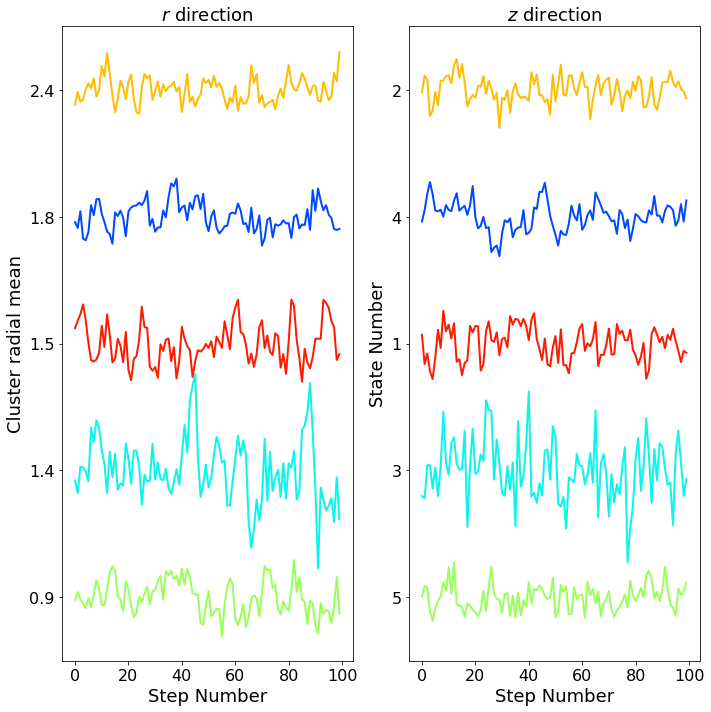

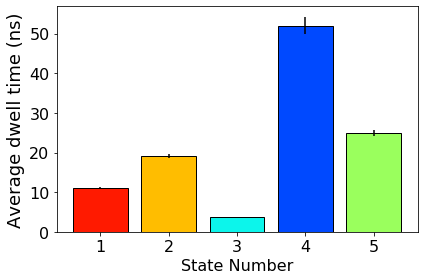

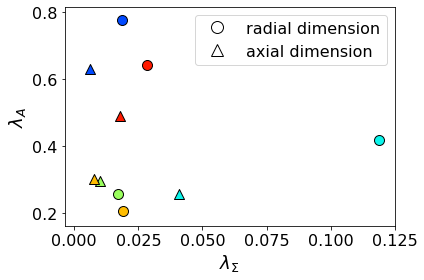

In [88]:
def cluster_behavior(params, percent=0, shift=1.5, states=None, seed=None, mimic_traj=None, saveprefix=None):
    """
    percent: only show states that are in this percent of total trajectories
    """

    rax = 0
    zax = 1
    
    z = params['ihmm_final'].z
    ihmm_final = params['ihmmr']
    mu = params['mu'][:, 0]

    # mu = np.linalg.norm(params['mu'][:, :2], axis=1)  # there's a bug that makes these means wrong
    
    nclusters = np.unique(z).size
    
    prevelant_states, state_counts = prevalent_states(z, percent=percent)  # the function is spelled right. The variable is spelled wrong
    fraction = state_counts / z.shape[0]
    
    if states is not None:
        
        prevelant_states = states

    reorder = np.argsort(mu[prevelant_states])
    prevelant_states = prevelant_states[reorder]

    # For methanol
    cmap = plt.cm.jet
    
    if mimic_traj is not None:
    
        shown_colors = np.array([cmap(i) for i in np.linspace(50, 225, len(np.unique(z[mimic_traj, :]))).astype(int)])

        if seed is not None:
            np.random.seed(seed)
            np.random.shuffle(shown_colors)
            
        color_mapping = {p:i for i, p in enumerate(np.unique(z[mimic_traj, :]))}
        keep = [color_mapping[i] for i in prevelant_states]
        shown_colors = shown_colors[keep]

    else:
        
        shown_colors = np.array([cmap(i) for i in np.linspace(50, 225, len(prevelant_states)).astype(int)])
        
    colors = np.array([cmap(i) for i in np.linspace(50, 225, nclusters).astype(int)])
    colors[prevelant_states] = shown_colors

    print('Prevelant States:', prevelant_states)

    #fig, ax = plt.subplots(1, 3, figsize=(10, 10), sharey=False, gridspec_kw={'width_ratios': [1, 1, 0.15]})
    fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=False)

    trajectory_generator = GenARData(params=params)

    A = params['A']
    sigma = params['sigma']
    T = params['T'] #.mean(axis=0)

    fig1, Tax = plt.subplots()
    fig2, Aax = plt.subplots()

    bin_width = 0.2
    
    ordered = list(np.argsort(state_counts)[::-1])
    
    Tx = [ordered.index(i) for i in prevelant_states]
    
    for i, s in enumerate(prevelant_states):
        #old functionality
        #Adiag = np.diag(A[s, 0, ...])
        #sigdiag = np.diag(sigma[s, ...])
        
        A_eig = np.linalg.eig(A[s, 0, ...])[0]
        sig_eig = np.linalg.eig(sigma[s, ...])[0]

        A_eigs = (np.square(A_eig[:2]).sum(), A_eig[2])
        sig_eigs = (sig_eig[:2].sum(), sig_eig[2])

        trajectory_generator.gen_trajectory(100, 1, state_no=s, progress=False)

        t = trajectory_generator.traj[:, 0, :]
        t -= t.mean(axis=0)

        dwells = np.array([0.5 * (1 / (1 - T[t, s, s])) for t in range(T.shape[0])])
        dwells_std = dwells.std()
        
        #Tax.bar(Tx[i], 0.5 * (1 / (1 - T[s, s])), color=colors[s], edgecolor='black')
        Tax.bar(Tx[i], dwells.mean(), color=colors[s], edgecolor='black', yerr=dwells.std())

        Aax.scatter(sig_eigs[0], A_eigs[0], color=colors[s], edgecolor='black', s=100)
        Aax.scatter(sig_eigs[1], A_eigs[1], color=colors[s], edgecolor='black', s=100, marker='^')
        
#         Aax.scatter(sig_eigs[0], sig_eigs[1], color=colors[s], edgecolor='black', s=100)
#         Aax.scatter(A_eigs[0], A_eigs[1], color=colors[s], edgecolor='black', s=100, marker='^')
        
        ax[zax].plot(t[:, 1] + i*shift, lw=2, color=colors[s])
        ax[rax].plot(t[:, 0] + i*shift, lw=2, color=colors[s])
        #ax[2].text(0, i*shift, '%.1f %%' % (100*fraction[s]), fontsize=16, horizontalalignment='center')

    ax[zax].set_yticks([i*shift for i in range(len(prevelant_states))])
    #ax[0].set_yticklabels(['%.1f %%' % (100*fraction[s]) for s in prevelant_states])

    #ax[zax].set_yticklabels(['%d' % (s + 1) for s in range(len(prevelant_states))])
    ax[zax].set_yticklabels([ordered.index(i) + 1 for i in prevelant_states])

    ax[rax].set_yticks([i * shift for i in range(len(prevelant_states))])
    ax[rax].set_yticklabels(['%.1f' % mu[p] for p in prevelant_states])

    ax[zax].set_xlabel('Step Number', fontsize=18)
    ax[zax].set_ylabel('State Number', fontsize=18)
    ax[rax].set_xlabel('Step Number', fontsize=18)
    ax[zax].set_title('$z$ direction', fontsize=18)
    ax[rax].set_title('$r$ direction', fontsize=18)
    ax[zax].tick_params(labelsize=16)
    ax[rax].tick_params(labelsize=16)
    ax[rax].set_ylabel('Cluster radial mean', fontsize=18)
#     ax[2].axis('off')
#     ax[2].set_yticks([i*shift for i in range(len(prevelant_states))])
#     ax[2].set_title('Percentage\nPrevalence', fontsize=18)

#     ax[2].set_xlim(0, 1)

    ax[zax].set_ylim(-shift/2, shift * len(prevelant_states) -shift/2)
    ax[rax].set_ylim(-shift/2, shift * len(prevelant_states) -shift/2)
    #ax[2].set_ylim(-shift, shift * len(prevelant_states))

    circle = mlines.Line2D([], [], color='white', markeredgecolor='black', marker='o', linestyle=None, label='radial dimension', markersize=12)
    square = mlines.Line2D([], [], color='white', markeredgecolor='black', marker='^', linestyle=None, label='axial dimension', markersize=12)

    Tax.set_ylabel('Average dwell time (ns)', fontsize=18)
    Tax.set_xticklabels([])

    Aax.set_ylabel('$\lambda_A$', fontsize=18)
    Aax.set_xlabel('$\lambda_{\Sigma}$', fontsize=18)
    #Aax.set_xticklabels([])
    Aax.tick_params(labelsize=16)
    Tax.tick_params(labelsize=16)
    Aax.legend(handles=[circle, square], fontsize=16)
    #sigax.tick_params(labelsize=14)
    Tax.set_xticks([i for i in range(len(prevelant_states))])
    Tax.set_xticklabels([i + 1 for i in range(len(prevelant_states))])
    Tax.set_xlabel('State Number', fontsize=16)

    fig1.tight_layout()
    fig2.tight_layout()
    fig.tight_layout()
    
    if saveprefix is not None:
        
        fig.savefig('%s/common_states.pdf' % saveprefix)
        fig1.savefig('%s/dwell_times.pdf' % saveprefix)
        fig2.savefig('%s/A_sigma_scatter.pdf' % saveprefix)

    plt.show()
    
    return prevelant_states

save = True
seed = 7
states = np.array([1, 3, 4, 14, 16, 19])  # define the states to study
states = None
mur = np.linalg.norm(mu[:2, :], axis=0)

saveprefix = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures'
saveprefix = None

dominant_states = cluster_behavior(final_parameters[nclusters], percent=25, shift=1, states=states, seed=seed, mimic_traj=2, 
                 saveprefix=saveprefix)

In [230]:
def get_hbonds(res):
    
    # coloring
    carb = 1
    head = 2
    tails = 3
    other_solutes = 0
    monomer_colors = {'O': head, 'O1': head, 'O2': head, 'O3': carb, 'O4': carb, 'O5': tails, 'O6': tails, 'O7': tails, 'O8': tails, 'O9': tails, 'O10': tails, 'N1': other_solutes, 'N': other_solutes}

    definitions = {0: 'Not Hbonded', 1: 'Carboxylates', 2: 'Ethers', 3: 'Tails'}
    
    hbonds = file_rw.load_object('trajectories/hbond_summary_%s.pl' % res)
    hbonded = hbonds['hbonded']
    hbonded_to = hbonds['bonded_to']

    # for color-coding types of hbonds
    monomer_hbonds = np.zeros_like(hbonded, dtype=int)
    for h in range(len(hbonded_to)):
        ndx = []
        for s in range(hbonded.shape[0]):
            if len(hbonded_to[h][s]) > 0:
                monomer_hbonds[s, h] = monomer_colors[hbonded_to[h][s][0][0]]
                ndx.append(s)
                
    return hbonded, monomer_hbonds, definitions
    
    
def get_density(res, ma=None):
    """ Load up local density timeseries and apply a moving average to the series (ma)
    """
    
    dens = file_rw.load_object('trajectories/local_density_%s.pl' % res)
    
    if ma is not None:
        density = np.zeros([dens.shape[0] - ma + 1, dens.shape[1]])
        for s in range(len(ihmm)):
            density[:, s] = timeseries.calculate_moving_average(dens[:, s], ma)

        return density
    
    else:
        return dens


def get_coordination(res):
    
    return file_rw.load_object('trajectories/coord_summary_%s.pl' % res)['coordinated']

# Plot fraction of time spent h-bonding in each state

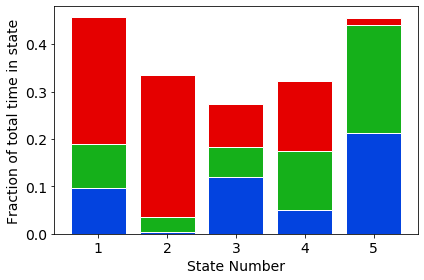

In [231]:
nclusters = 10
z = final_parameters[nclusters]['z']

hbonded, monomer_hbonds, definitions = get_hbonds(res)

save = False

if save:
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/hbond_fractions.pdf'
    
else:
    
    savename = None

hbond_fraction(z, monomer_hbonds, savename=savename)

# Plot hydrogen bond lifetimes in each region of each state

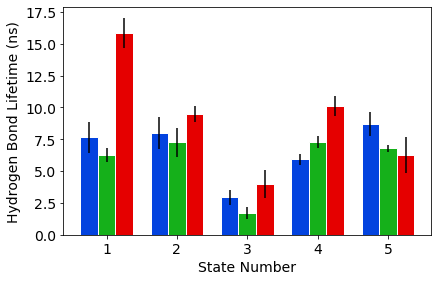

In [195]:
save = False

if save:
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/hbond_lifetimes.pdf'
    
else:
    
    savename = None


hbond_lifetimes(z, monomer_hbonds, savename=savename)

# Plot Sodium Ion Association Fractions and Lifetimes

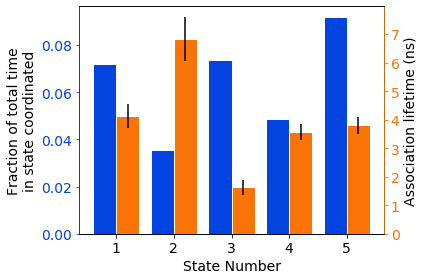

In [229]:
coord = get_coordination(res)

save = False

if save:
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/association_fraction_lifetimes.pdf'
    
else:
    
    savename = None

association_fraction_lifetimes(z, coord, colors=('xkcd:blue', 'xkcd:orange'), savename=savename)

# Plot local density surrounding solutes

In [378]:
def local_density(z, dens, colors=('xkcd:blue', 'xkcd:orange', 'xkcd:red'), bar_width=0.25, dt=0.5, savename=savename, 
                  dwell_percentile=95):

    dominant_states, dominant_state_counts = prevalent_states(z, percent=20)
    ordered_ = list(np.argsort(dominant_state_counts)[::-1])
    ordered = [list(dominant_states).index(i) for i in ordered_[:len(dominant_states)]]

    fig, ax = plt.subplots()
#     ax2 = ax.twinx()

    nT = dens.shape[0]
    
    for i, s in enumerate(dominant_states[ordered]):
        
        # Get dwell times
        dwells = []
        for t in range(dens.shape[1]):
            
            ndx = np.where(z[t, :] == s)[0]
            
            if len(ndx) > 0:
                
                seq = np.zeros(nT)
                seq[ndx] = 1
                
                sp = ts.switch_points(seq)

#                 if z[t, 0] != s:
                if seq[0] != 1:
                    sp = sp[1:]

                end = sp[1::2]
                begin = sp[::2]

                dwells += (end - begin[:end.size]).tolist()

        dwells = np.array(dwells)[np.argsort(dwells)]
        boundary = np.percentile(dwells, dwell_percentile)
        
        print(boundary * 0.5)

        density = []
        density_long_dwells = []
        density_short_dwells = []
        for t in range(dens.shape[1]):
            
            ndx = np.where(z[t, :] == s)[0]
            
            if len(ndx) > 0:
                
                seq = np.zeros(nT)
                seq[ndx] = 1
                
                sp = ts.switch_points(seq)

#                 if z[t, 0] != s:
                if seq[0] != 1:
                    sp = sp[1:]

                end = sp[1::2]
                begin = sp[::2]
                
                for j in range(end.size):
                    d = dens[begin[j]:end[j], t].tolist()
                    if end[j] - begin[j] > boundary:
                        density_long_dwells += d
                    else:
                        density_short_dwells += d
                
                density += dens[ndx, t].tolist()

        #boot = bootstrap_lifetimes(lifetimes)
        ax.bar(i - bar_width, np.mean(density), bar_width, color=colors[0], edgecolor='white', lw=1)
        ax.bar(i, np.mean(density_long_dwells), bar_width, color=colors[1], edgecolor='white', lw=1)
        ax.bar(i + bar_width, np.mean(density_short_dwells), bar_width, color=colors[2], edgecolor='white', lw=1)
#         ax2.bar(i + bar_width/2, dt*boot.mean(), bar_width, color=colors[1], edgecolor='white', lw=1, 
#                 yerr=dt*boot.std())

    ax.set_xticks(np.arange(dominant_states.size))
    ax.set_xticklabels(np.arange(1, dominant_states.size + 1))
    ax.tick_params(labelsize=14)
#     ax2.tick_params(labelsize=14)
    ax.set_xlabel('State Number', fontsize=14)
    ax.set_ylabel('Local Number Density\n(heavy atoms / nm$^3$)', fontsize=14)
#     ax2.set_ylabel('Association lifetime (ns)', fontsize=14)
    
#     ax2.spines['left'].set_color(colors[0])
#     ax2.spines['right'].set_color(colors[1])
    
#     ax.tick_params(labelsize=14, axis='y', colors=colors[0])
#     ax2.tick_params(labelsize=14, axis='y', colors=colors[1])
    ax.tick_params(labelsize=14)
    ax.set_ylim(35, 42)
    
    hatches = []
    labels = ['Overall', 'Long trapping times', 'Short trapping times']
    for i in range(3):
        hatches.append(mpatches.Patch(facecolor=colors[i], label=labels[i], edgecolor='white'))

    fig.legend(handles=hatches, fontsize=14, loc='upper left', bbox_to_anchor=(0.17, 0.95), frameon=False)
    
    fig.tight_layout()
    
    if savename is not None:
        
        plt.savefig(savename)

    plt.show()

3.0
3.5
1.5
6.5
5.0


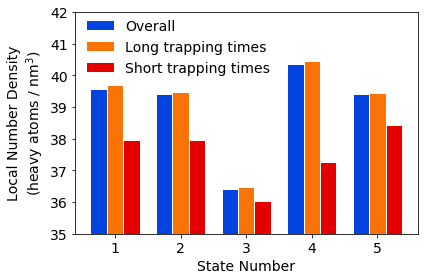

In [381]:
density = get_density(res)

save = True

if save:
    
    savename = '/home/ben/github/LLC_Membranes/Ben_Manuscripts/hdphmm/figures/local_densities.pdf'
    
else:
    
    savename = None

local_density(z, density, colors=('xkcd:blue', 'xkcd:orange', 'xkcd:red'), bar_width=0.25, dt=0.5, 
              dwell_percentile=50, savename=savename)